## this is my project (Wrangle and Analyze Data) 
##### this script wrangle_act in python 
### there are 3 steps: 
1- Gathering
2- Assessing
3- Cleaning

In [1]:
# import libraries that we need in this project

import pandas as pd
import numpy as np 
import requests
import tweepy 
import os
import json 
import time 


# 1 / Gathering Data 

In [2]:
# read csv file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# read tsv file (The tweet image predictions)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open (os.path.join('image_predictions.tsv'),'wb') as file:
    file.write(response.content)    

In [4]:
# read image predictions

image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### I used two files that I downloaded from my classroom in Udacity  
#### I tried to set up a twitter developer account, but my application was not approved.
##### The following code is the Twitter API code supported by Udacity.


 import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

 NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
 change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
 NOTE TO REVIEWER: this student had mobile verification issues so the following
 Twitter API code was sent to this student from a Udacity instructor
 Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

 Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
 Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



##### 1-tweet_json.txt and  2-twitter_api.py

In [5]:
# read this tweet_json.txt file line by line into a pandas DataFrame 
# with (at minimum) tweet ID, retweet count, and favorite count 
tweet_data = []
with open ('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_data.append(tweet)
        except:
            continue 
tweet_api = pd.DataFrame(tweet_data, columns = list(tweet_data[0].keys()))

In [6]:
tweet_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3261,20562,False,False,False,False,en
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2158,12041,False,False,False,False,en
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,16716,56848,False,False,False,False,en
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4429,28226,False,False,False,False,en
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,890240255349198849,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,7711,32467,False,False,False,False,en


In [7]:
# put columns name and data 
our_data = tweet_api[['id','retweet_count','favorite_count']]
our_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [8]:
our_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Source: 
 https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python

# 2 / Assessing Data

#### After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in my wrangle_act.ipynb Jupyter Notebook.

### we have three datasets:
####  1- twitter_archive
#### 2- image_pred
#### 3- our_data



### 1- twitter_archive

In [9]:
# quick check dataset by using info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# quick check for dataset 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# no duplicated id in twitter_archive
twitter_archive.tweet_id.duplicated().sum()

0

In [12]:
# find value count for rating_numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# find value count for rating_denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# check for rating_denominator not equal 10
twitter_archive.loc[twitter_archive.rating_denominator != 10, ['text','rating_denominator','rating_numerator']]

,text,rating_denominator,rating_numerator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,0,960
342,@docmisterio account started on 11/15/15,15,11
433,The floofs have been released I repeat the flo...,70,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7,24
784,"RT @dog_rates: After so many requests, this is...",11,9
902,Why does this never happen at my front door......,150,165
1068,"After so many requests, this is Bretagne. She ...",11,9
1120,Say hello to this unbelievably well behaved sq...,170,204
1165,Happy 4/20 from the squad! 13/10 for all https...,20,4
1202,This is Bluebert. He just saw that both #Final...,50,50


In [15]:
# check for rating_numerator not equais greater than 15
twitter_archive.loc[twitter_archive.rating_numerator > 15, ['text','rating_denominator','rating_numerator']]

,text,rating_denominator,rating_numerator
55,@roushfenway These are good dogs but 17/10 is ...,10,17
188,@dhmontgomery We also gave snoop dogg a 420/10...,10,420
189,@s8n You tried very hard to portray this good ...,10,666
290,@markhoppus 182/10,10,182
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,0,960
340,"RT @dog_rates: This is Logan, the Chow who liv...",10,75
433,The floofs have been released I repeat the flo...,70,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7,24
695,"This is Logan, the Chow who lived. He solemnly...",10,75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10,27


In [16]:
# check if name is a titlecased string otherwise it returns False
twitter_archive.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [17]:
# check for names , we want to find out if there is name which length less than 3 
twitter_archive.loc[twitter_archive.name.apply(len) < 3, ['name','tweet_id']]

,name,tweet_id
56,a,881536004380872706
393,Mo,825876512159186944
446,Bo,819015337530290176
449,Bo,819004803107983360
553,Bo,804026241225523202
583,Bo,800188575492947969
649,a,792913359805018113
679,Bo,789137962068021249
686,Bo,788070120937619456
759,an,778396591732486144


In [18]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Bailey            7
Toby              7
an                7
Buddy             7
Bella             6
Scout             6
Stanley           6
Milo              6
Leo               6
Koda              6
Rusty             6
Oscar             6
Dave              6
Jack              6
Jax               6
Louis             5
               ... 
Cleopatricia      1
Griswold          1
Ron               1
Hazel             1
Mojo              1
Izzy              1
Andru             1
Glenn             1
Patch             1
Poppy             1
Tilly             1
Karma             1
Alfy              1
Mark              1
Furzey            1
Ralph             1
Dug               1
Jomathan          1
Jiminus           1


In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Source: https://www.geeksforgeeks.org/python-string-istitle/

### 2- image_pred

In [20]:
# quick check for data by using info 
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# quick check for data 
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# no duplicated in id 
image_pred.tweet_id.duplicated().sum()

0

In [23]:
# find value count for image number
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
# find value count for p1
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [25]:
# find value count for p2
image_pred.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
chow                               20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [26]:
# find value count for p3
image_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [27]:
# there are 66 duplicate in jpg_url 
image_pred.jpg_url.duplicated().sum()

66

#### 3- our_data

In [28]:
# quick check for data by using info 
our_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
# quick check for data 
our_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [30]:
# there is no duplicated
our_data.id.duplicated().sum()

0

In [31]:
# find value count for retweet_count
our_data.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [32]:
# find value count for favorite_count
our_data.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [33]:
# change column name from id to tweet_id
our_data = our_data.rename(columns = {"id" : "tweet_id"})

In [34]:
our_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Quality Issues:
### twitter_archive
- timestamp, retweeted_status_timestamp neet to change datatype to datetime .
- tweet_id need to change datatype to string.
- lots of NAN, None in doggo,floofer,pupper,puppo .
- in column (name) there are invalid names such as (a, b , an....).
- source can't be read! .
- source need to change datatype to category.
- retweet must be delete.
- name must be title case

### image_pred 
- tweet_id need change datatype to string .

### our_data
- tweet_id need to change datatype to string

## Tidiness Issues:
### twitter_archive
- doggo,floofer,pupper,puppo need to be in one column called "Dog_Stage"

### image_pred 
- p1,p2p,p3 (breed columns) need to add to twitter_archive

### our_data
- retweet_count	favorite_count need to add to twitter_archive 

#### I will drop unnecessary columns after merge dataset 

# 3 / Cleaning Data

In [35]:
# make a copy for each dataset
twitter_archive_copy = twitter_archive.copy()
image_pred_copy = image_pred.copy()
our_data_copy = our_data.copy()

temp_data = twitter_archive_copy.merge(image_pred_copy, left_on='tweet_id', right_on='tweet_id')

df_new = temp_data.merge(our_data_copy, left_on='tweet_id', right_on='tweet_id')

### Quality Issues: Solutions

### Define:

#### timestamp, retweeted_status_timestamp neet to change datatype to datetime .

### Code

In [36]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

In [37]:
twitter_archive_copy['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_copy['retweeted_status_timestamp'])

### Test

In [38]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Define:

#### tweet_id need to change datatype to string.((( in all 3 datasets))) 

## Iwill comment this step because when I do it, merge datasets not working, so I change tweet_id datatype after merge. 

### Code

In [39]:
#twitter_archive_copy['tweet_id'] = str(twitter_archive_copy['tweet_id'])

In [40]:
#image_pred_copy['tweet_id'] = str(image_pred_copy['tweet_id'])

In [41]:
#our_data_copy['tweet_id'] = str(our_data_copy['tweet_id'])

### Test

In [42]:
#twitter_archive_copy.tweet_id.dtypes

In [43]:
#image_pred_copy.tweet_id.dtypes

In [44]:
#our_data_copy.tweet_id.dtypes

### Define:

#### lots of NAN, None in dogggo,floofer,pupper,puppo .

### Code

In [45]:
twitter_archive_copy['doggo'] = twitter_archive_copy['doggo'].replace('None','')

In [46]:
twitter_archive_copy['floofer'] = twitter_archive_copy['floofer'].replace('None','')

In [47]:
twitter_archive_copy['pupper'] = twitter_archive_copy['pupper'].replace('None','')

In [48]:
twitter_archive_copy['puppo'] = twitter_archive_copy['puppo'].replace('None','')

### Test

In [49]:
twitter_archive_copy['doggo'].value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [50]:
twitter_archive_copy['floofer'].value_counts()

           2346
floofer      10
Name: floofer, dtype: int64

In [51]:
twitter_archive_copy['pupper'].value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

In [52]:
twitter_archive_copy['puppo'].value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

### Define:

#### in column (name) there are invalid names such as (a, b , an...) 

### Code

In [53]:
names = ['a', 'an', 'my','by','not', 'one','his', 'mad','the','old','this','such','very','just','None','quite']

for fix in names:
    twitter_archive_copy.loc[twitter_archive_copy.name == fix, 'name'] = None

### Test

In [54]:
twitter_archive_copy.name.value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
Bailey        7
Toby          7
Daisy         7
Buddy         7
Milo          6
Rusty         6
Koda          6
Oscar         6
Bella         6
Leo           6
Stanley       6
Jax           6
Dave          6
Jack          6
Scout         6
Phil          5
Alfie         5
Bentley       5
Sammy         5
Finn          5
             ..
Griswold      1
Ron           1
Hazel         1
Mojo          1
Acro          1
Theo          1
Darla         1
Tove          1
Patch         1
Poppy         1
Donny         1
Karma         1
Alfy          1
Mark          1
Furzey        1
Ralph         1
Dug           1
Jomathan      1
Jiminus       1
Glenn         1
Leonard       1
Bonaparte     1
Aubie         1
Leonidas      1
Mabel         1
Tito          1
Stefan        1
Grady         1
Gunner        1
Spanky        1
Name: name, Length: 941,

### Define:

#### source can't be read! so we have to change it to easy reading

### Code

In [55]:
twitter_archive_copy.source = twitter_archive_copy.source.str.replace(r'<(?:a\b[^>]*>|/a>)','')

### Test

In [56]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define:

#### source need to change datatype to category.

### Code

In [57]:
twitter_archive_copy.source = twitter_archive_copy.source.astype('category')

### Test

In [58]:
twitter_archive_copy.source.dtypes

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
                 ordered=False)

In [59]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define:

#### retweet must be delete

### Code

In [60]:
twitter_archive_copy.loc[twitter_archive_copy['text'].str.startswith('RT') != False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,,,,
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,,,,
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,,,,
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,,,,
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,,,,
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,Twitter for iPhone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,,,,
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14,10,None,,,pupper,
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,Twitter for iPhone,RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,,,,
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,Twitter for iPhone,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,,,,
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,,,pupper,


In [61]:
twitter_archive_copy = twitter_archive_copy.loc[twitter_archive_copy['text'].str.startswith('RT') == False]

#### Source: https://www.programiz.com/python-programming/methods/string/startswith

### Test

In [62]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null category
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          1403 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
dtypes: category(1),

### Define:

#### name must be title case

### Code

In [63]:
twitter_archive_copy.name = twitter_archive_copy.name.str.title()

### Test

In [64]:
twitter_archive_copy.name.value_counts()

Charlie         11
Lucy            11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Lola             8
Sadie            8
Winston          8
Toby             7
Daisy            7
Oscar            6
Bailey           6
Koda             6
Stanley          6
Jax              6
Bella            6
Bo               6
Buddy            5
Leo              5
Bentley          5
Chester          5
Scout            5
Louis            5
Dave             5
Milo             5
Rusty            5
Oakley           4
Cassie           4
Dexter           4
                ..
Cleopatricia     1
Griswold         1
Ron              1
Jordy            1
Glenn            1
Gunner           1
Pepper           1
Grady            1
Rudy             1
Meyer            1
Tove             1
Poppy            1
Donny            1
Karma            1
Alfy             1
Mark             1
Chesney          1
Bungalo          1
Ralph            1
Dug              1
Jomathan         1
Patch       

### Tidiness Issues: Solutions


### Define:

#### doggo,floofer,pupper,puppo need to be in one column called "Dog_Stage"

### Code

In [65]:
twitter_archive_copy['Dog_Stage'] = twitter_archive_copy['doggo']+twitter_archive_copy['floofer']+twitter_archive_copy['pupper']+twitter_archive_copy['puppo']

In [66]:
twitter_archive_copy.Dog_Stage.value_counts()

                1829
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: Dog_Stage, dtype: int64

In [67]:
twitter_archive_copy['Dog_Stage'] = twitter_archive_copy['Dog_Stage'].replace('',np.nan)

#### we can notice there are doggopupper, doggopuppo, doggofloofer
#### so we have to fix it 

In [68]:
twitter_archive_copy.loc[twitter_archive_copy['Dog_Stage'] == 'doggopupper','Dog_Stage'] = 'doggo,pupper'

In [69]:
twitter_archive_copy.loc[twitter_archive_copy['Dog_Stage'] == 'doggopuppo','Dog_Stage'] = 'doggo,puppo'

In [70]:
twitter_archive_copy.loc[twitter_archive_copy['Dog_Stage'] == 'doggofloofer','Dog_Stage'] = 'doggo,floofer'

### Test

In [71]:
twitter_archive_copy.Dog_Stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: Dog_Stage, dtype: int64

### Define:

#### Drop unnecessary columns for our anaylsis
##### 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','doggo','floofer','pupper','puppo'

### Code

In [72]:
twitter_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','doggo','floofer','pupper','puppo'], axis=1, inplace=True)

### Test

In [73]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null category
text                  2173 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  1403 non-null object
Dog_Stage             344 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 138.1+ KB


### Define:

#### Merge our_data_copy to  twitter_archive_copy and save it new dataset called (temp_data)

### Code

In [74]:
temp_data = twitter_archive_copy.merge(our_data_copy, left_on='tweet_id', right_on='tweet_id')

### Test

In [75]:
temp_data

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,Dog_Stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,NaN,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,2158,12041
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,NaN,16716,56848
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,4429,28226
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,7711,32467


In [76]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 10 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null category
text                  2173 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  1403 non-null object
Dog_Stage             344 non-null object
retweet_count         2173 non-null int64
favorite_count        2173 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(3)
memory usage: 172.1+ KB


### Define:

#### Merge image_pred to temp_data and save it in new dataset called (twitter_archive_master)

### Code

In [77]:
twitter_archive_master = temp_data.merge(image_pred_copy, left_on='tweet_id', right_on='tweet_id')

### Test

In [78]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 21 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null category
text                  1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1360 non-null object
Dog_Stage             306 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-

#### change datatype for tweet_id to string

In [79]:
twitter_archive_master['tweet_id'] = str(twitter_archive_master['tweet_id'])


In [80]:
twitter_archive_master.tweet_id.dtypes

dtype('O')

### store data in csv 

In [81]:
twitter_archive_master.to_csv('twitter_archive_master', index = False)

# Visualization

In [82]:
import matplotlib.pyplot as plt 
import seaborn as sns


### Q1 - What is the rate of Dog Stage?

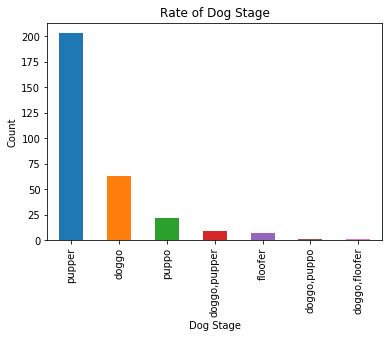

In [105]:
twitter_archive_master['Dog_Stage'].value_counts().plot(kind = 'bar');
plt.title('Rate of Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.savefig('dog_stage.png');

### Q2 - Is there a relationship betweet variables?

#### we will use correlation map

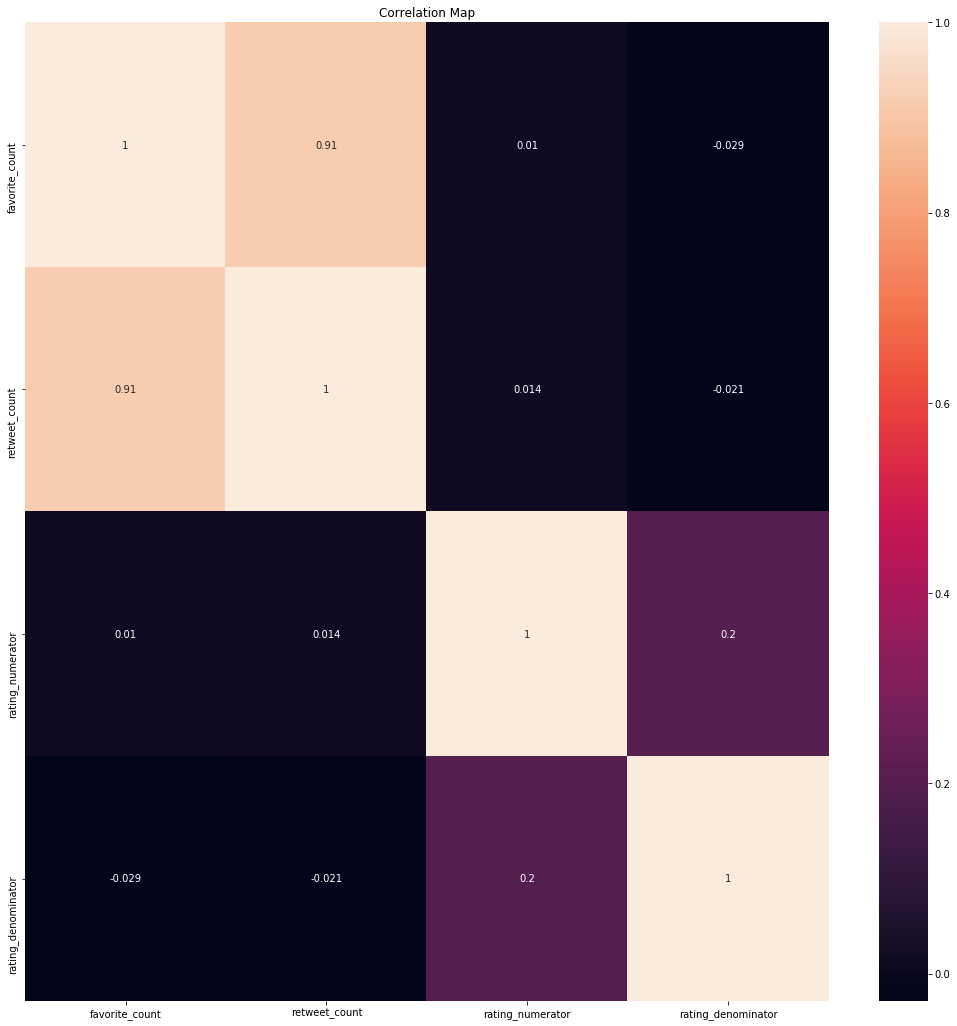

In [104]:
size = plt.subplots(figsize=(18, 18))
sns.heatmap(twitter_archive_master[['favorite_count','retweet_count','rating_numerator','rating_denominator']].corr(), annot=True)
plt.title('Correlation Map')
plt.savefig('heat_map.png');

### Q3 - What is the popular name?

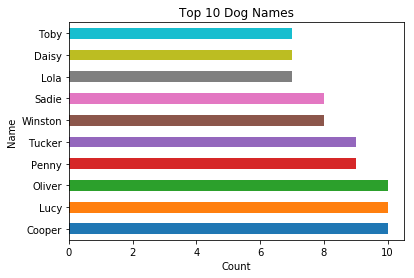

In [103]:
top_names = twitter_archive_master.name.value_counts()[1:11].sort_values(axis=0, ascending=False)
top_names.plot(kind = 'barh')
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.savefig('top-names.png');

#### source: https://stackoverflow.com/questions/43859416/finding-top-10-in-a-dataframe-in-pandas

### Q4- What kind of source people like it more?

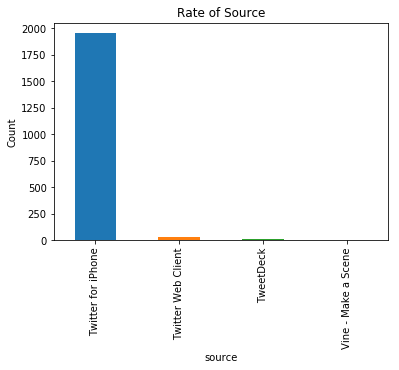

In [106]:
twitter_archive_master['source'].value_counts().plot(kind = 'bar');
plt.title('Rate of Source')
plt.xlabel('source')
plt.ylabel('Count')
plt.savefig('source.png');